# **Import Library**

In [2]:
import os
import itertools
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from keras.models import Model
from keras.layers import Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.applications import DenseNet121
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Activation, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# **Persiapan Dataset**

In [3]:
# lokasi dataset - ubah sesuai dengan lokasi anda mengupload folder datanya
root_path = 'D:\Skirpsi\Risal\Dataset'

# opsional - tampilkan info lokasi dataset
print("Path root:", root_path)

Path root: D:\Skirpsi\Risal\Dataset


In [27]:
base_dir = os.path.join(os.path.dirname(root_path), 'Dataset')
os.listdir(base_dir)

['skripsi.h5', 'Test', 'test2', 'Train', 'Val']

In [28]:
datagen = ImageDataGenerator(rescale=1.0/255.0,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [6]:
tes_dir = os.path.join(base_dir, 'Test')

test_generator = datagen.flow_from_directory(
    tes_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Jangan mengacak urutan gambar
)

Found 339 images belonging to 3 classes.


In [7]:
train_dir = os.path.join(base_dir, 'Train')

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Jangan mengacak urutan gambar
)

Found 4495 images belonging to 3 classes.


In [8]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

val_dir = os.path.join(base_dir, 'Val')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Jangan mengacak urutan gambar
)

Found 177 images belonging to 3 classes.


# **Augmentasi Gambar**

In [9]:
# # Melakukan augmentasi dan menyimpan data sebagai file gambar terpisah dalam subfolder yang sesuai
# augmented_dir = os.path.join(base_dir, 'Train')
# os.makedirs(augmented_dir, exist_ok=True)

# num_augmented_images = 200

# for i in range(num_augmented_images):
#     batch = test_generator.next()
#     for j in range(len(batch[0])):
#         image = (batch[0][j] * 255).astype(np.uint8)
#         class_name = list(test_generator.class_indices.keys())[np.argmax(batch[1][j])]
#         class_folder = os.path.join(augmented_dir, class_name)
#         os.makedirs(class_folder, exist_ok=True)
#         file_name = f"augmented_{i}_class_{class_name}_index_{j}.jpg"
#         file_path = os.path.join(class_folder, file_name)
#         cv2.imwrite(file_path, image)

# # Menampilkan pesan "Augmented Complete" dan jumlah data setiap subfolder
# print("Augmented Complete")
# for class_name in test_generator.class_indices.keys():
#     class_folder = os.path.join(augmented_dir, class_name)
#     num_images = len([f for f in os.listdir(class_folder) if f.endswith('.jpg')])
#     print(f"Kelas {class_name}: Jumlah gambar augmented = {num_images}")

# **Cek Jumlah Dataset**

In [10]:
# Jumlah Data Original
gereja_katolik_santo_yusuf = os.path.join(tes_dir, 'gereja katolik santo yusuf/')
ketandan = os.path.join(tes_dir, 'ketandan/')
masjid_maguyuono = os.path.join(tes_dir, 'masjid maguyuono/')

class_names = ['gereja katolik santo yusuf',
                'ketandan',
                'masjid maguyuono']
total_tes_data = 0

for class_name in class_names:
    class_folder = os.path.join(tes_dir, class_name)
    num_images = len(os.listdir(class_folder))
    print(f'Jumlah gambar {class_name} :', num_images)
    total_tes_data += num_images

print('Total data Testing:', total_tes_data)

Jumlah gambar gereja katolik santo yusuf : 140
Jumlah gambar ketandan : 100
Jumlah gambar masjid maguyuono : 99
Total data Testing: 339


In [11]:
# Jumlah Data Training
gereja_katolik_santo_yusuf = os.path.join(train_dir, 'gereja katolik santo yusuf/')
ketandan = os.path.join(train_dir, 'ketandan/')
masjid_maguyuono = os.path.join(train_dir, 'masjid maguyuono/')

class_names = ['gereja katolik santo yusuf',
                'ketandan',
                'masjid maguyuono']
total_train_data = 0

for class_name in class_names:
    class_folder = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_folder))
    print(f'Jumlah gambar {class_name} :', num_images)
    total_train_data += num_images

print('Total data training:', total_train_data)

Jumlah gambar gereja katolik santo yusuf : 1495
Jumlah gambar ketandan : 1500
Jumlah gambar masjid maguyuono : 1500
Total data training: 4495


In [12]:
# Jumlah Data Original
gereja_katolik_santo_yusuf = os.path.join(val_dir, 'gereja katolik santo yusuf/')
ketandan = os.path.join(val_dir, 'ketandan/')
masjid_maguyuono = os.path.join(val_dir, 'masjid maguyuono/')

class_names = ['gereja katolik santo yusuf',
                'ketandan',
                'masjid maguyuono']
total_val_data = 0

for class_name in class_names:
    class_folder = os.path.join(val_dir, class_name)
    num_images = len(os.listdir(class_folder))
    print(f'Jumlah gambar {class_name} :', num_images)
    total_val_data += num_images

print('Total data Validation:', total_val_data)

Jumlah gambar gereja katolik santo yusuf : 64
Jumlah gambar ketandan : 64
Jumlah gambar masjid maguyuono : 49
Total data Validation: 177


In [13]:
# check type of each class
print(f"The Train has {train_generator.num_classes} classes: {train_generator.class_indices}")
print(f"The Validation has {val_generator.num_classes} classes: {val_generator.class_indices}")
print(f"The Test has {test_generator.num_classes} classes: {test_generator.class_indices}")

The Train has 3 classes: {'gereja katolik santo yusuf': 0, 'ketandan': 1, 'masjid maguyuono': 2}
The Validation has 3 classes: {'gereja katolik santo yusuf': 0, 'ketandan': 1, 'masjid maguyuono': 2}
The Test has 3 classes: {'gereja katolik santo yusuf': 0, 'ketandan': 1, 'masjid maguyuono': 2}


In [14]:
# check shapes
for image_batch, labels_batch in train_generator:
    print(f"Train Shape: {image_batch.shape} (Bathes = {len(train_generator)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in val_generator:
    print(f"Validation Shape: {image_batch.shape} (Bathes = {len(val_generator)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in test_generator:
    print(f"Testing Shape: {image_batch.shape} (Bathes = {len(test_generator)})")
    print(f"Testing label: {labels_batch.shape}\n")
    break

Train Shape: (32, 224, 224, 3) (Bathes = 141)
Train label: (32, 3)

Validation Shape: (32, 224, 224, 3) (Bathes = 6)
Validation label: (32, 3)

Testing Shape: (32, 224, 224, 3) (Bathes = 11)
Testing label: (32, 3)



# **Membangun Model Ke-1**

In [15]:
# Create the base model from the pre-trained model MobileNet V2
base_model = DenseNet121( weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Build your custom head model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Combine the base model and the custom head model
model = Model(inputs=base_model.input, outputs=predictions)

In [18]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [20]:
checkpoint_filepath = os.path.join(root_path, 'skripsi.h5')

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    verbose=1,
    mode='auto',
    save_best_only=True)

In [21]:
# Definisikan callback Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Berdasarkan penurunan val_loss
    patience=5,                # Berhenti jika tidak ada perbaikan setelah 5 epoch
    restore_best_weights=True  # Kembalikan berat model ke yang terbaik
)

In [22]:
# Fit model dengan Fine-tunning
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=141,     # Total data / batch_size
    epochs=15,
    validation_steps=6,
    verbose=1,
    callbacks=[model_checkpoint_callback, early_stopping]
)

Epoch 1/15
141/141 [==============================] - ETA: 0s - loss: 0.7683 - accuracy: 0.6839
Epoch 1: val_accuracy improved from -inf to 0.90960, saving model to D:\Skirpsi\Risal\Dataset\skripsi.h5


c:\Users\MSI BRAVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - 339s 2s/step - loss: 0.7683 - accuracy: 0.6839 - val_loss: 0.2719 - val_accuracy: 0.9096
Epoch 2/15
141/141 [==============================] - ETA: 0s - loss: 0.3473 - accuracy: 0.8636
Epoch 2: val_accuracy improved from 0.90960 to 0.93785, saving model to D:\Skirpsi\Risal\Dataset\skripsi.h5
141/141 [==============================] - 310s 2s/step - loss: 0.3473 - accuracy: 0.8636 - val_loss: 0.1765 - val_accuracy: 0.9379
Epoch 3/15
141/141 [==============================] - ETA: 0s - loss: 0.2203 - accuracy: 0.9239
Epoch 3: val_accuracy improved from 0.93785 to 0.96610, saving model to D:\Skirpsi\Risal\Dataset\skripsi.h5
141/141 [==============================] - 315s 2s/step - loss: 0.2203 - accuracy: 0.9239 - val_loss: 0.1383 - val_accuracy: 0.9661
Epoch 4/15
141/141 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9531
Epoch 4: val_accuracy did not improve from 0.96610
141/141 [==============================] - 315s 2

# **Menampilkan statistik pelatihan**

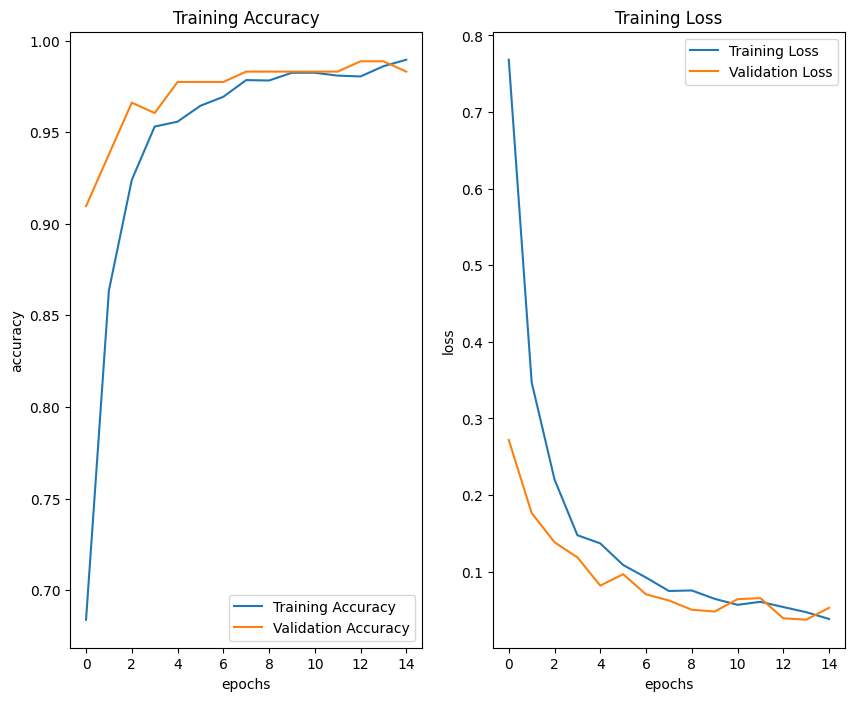

In [23]:
# ambil statistik pelatihan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

# plot hasil akurasi pelatihan
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Training Accuracy')

# plot hasil loss pelatihan
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Training Loss')
plt.show()

# **Evaluasi Model**

In [24]:
# load hasil pelatihan untuk di uji
trained_model = load_model(checkpoint_filepath)

# pengujian dengan data uji
trained_model.evaluate(test_generator, verbose=1)

11/11 [==============================] - 65s 5s/step - loss: 0.0185 - accuracy: 0.9971


[0.018509885296225548, 0.9970501661300659]

11/11 [==============================] - 57s 5s/step


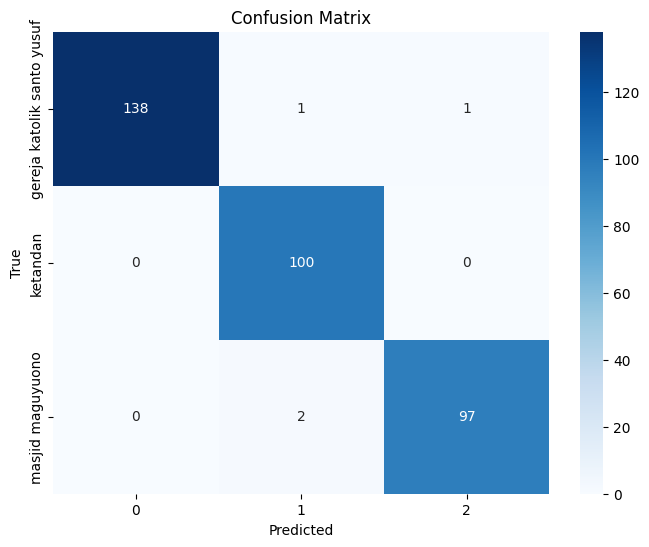

In [25]:
# Confusion Matrix
# Y_pred = model.predict(val_generator, val_generator.samples / val_generator.batch_size + 1)

import seaborn as sns
predictions  = model.predict(test_generator, test_generator.samples / test_generator.batch_size + 1)
predicted_labels = np.argmax(predictions, axis=1)

# Mendapatkan kelas sebenarnya dari generator
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

                            precision    recall  f1-score   support

gereja katolik santo yusuf       1.00      0.99      0.99       140
                  ketandan       0.97      1.00      0.99       100
          masjid maguyuono       0.99      0.98      0.98        99

                  accuracy                           0.99       339
                 macro avg       0.99      0.99      0.99       339
              weighted avg       0.99      0.99      0.99       339

